In [ ]:
#!jupyter nbconvert --to script Inequal_test.ipynb

In [13]:
from math import pi, sqrt, floor
import time
#import clear
import numpy as np
from random import uniform

from qiskit import *
from qiskit.tools.monitor import job_monitor 
from qiskit.circuit.library import XGate, CXGate
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D as ax

import warnings
warnings.filterwarnings('ignore')

In [14]:
def measurement_as_int(qc, job, shots):
    #sorts 
    num_measurements = qc.num_clbits
    result = job.get_memory(0)
    a = []
    for c_size in range(num_measurements):
        tmp = []
        for i in range(shots):
            x = int(result[i][c_size])
            tmp.append(x)
        a.append(tmp)
    return a

In [15]:
def make_bell_test_circuit(circ, n, m):
    alice = 0
    alice_referee = 1
    bob = 2
    bob_referee = 3

    circ.h(alice)
    circ.cx(alice, bob)
    
    circ.append(XGate().power(n), [alice])
    #circ.h(alice)
    #circ.p(n, alice)
    #circ.h(alice)
    
    circ.barrier()

    circ.h(alice_referee)
    circ.h(bob_referee)

    circ.append(CXGate().power(m), [alice_referee, alice])
    #circ.h(alice)
    #circ.cp(m, alice_referee, alice)
    #circ.h(alice)
    circ.append(CXGate().power(m), [bob_referee, bob])
    #circ.h(bob)
    #circ.cp(m, bob_referee, bob)
    #circ.h(bob)

    circ.measure_all()

    return circ

In [16]:
def main(n, m):
    qc = QuantumCircuit(4)
    make_bell_test_circuit(qc, n, m)

    #small_devices = provider.backends(filters=lambda x: x.configuration().n_qubits >= 4
    #                               and not x.configuration().simulator)
    #backend = least_busy(small_devices)
    #backend = provider.get_backend('ibmq_manila')
    backend = Aer.get_backend('qasm_simulator')
    
    job = execute(qc, backend, shots=repetitions, optimization_level=3, memory=True)
    #job_monitor(job)
    job = job.result()

    a = measurement_as_int(qc, job=job, shots=repetitions)
    
    outcomes = []
    win_outcomes = []
    
    for i in range(repetitions):
        j = (a[0][i] ^ a[2][i] == a[1][i] & a[3][i])
        if j is True:
            outcomes.append('1')
            win_outcomes.append('1')
        else:
            outcomes.append('0')
            
    outcomes = ''.join(outcomes)
    win_percent = ( len(win_outcomes) / repetitions ) * 100
    
    return win_percent

In [17]:
#if __name__ == '__main__':
def gradient_method():
    #declarations
    max_num = 0
    index = [0, 0]
    
    print("{} circuit repitions at {} precision".format(repetitions, stepc))
    print()
    print("Beginning gradient method")
    print("---")
    
    #log of maximum outcome with corresponding array space
    log = []
    index_log = []
    
    #initialize random values within x & y
    init_rand_value = [round(uniform(xinitial, xlength), deci_round), round(uniform(yinitial, ylength), deci_round)]
    #find index of random values
    newIndex = [0, 0]
    for i in range(len(x)):
        if round(x[i], deci_round) == init_rand_value[0]:
            newIndex[0] = i
            
    for i in range(len(y)):
        if round(y[i], deci_round) == init_rand_value[1]:
            newIndex[1] = i
    
    print("Initial point: ", newIndex, round(x[newIndex[0]], deci_round), round(y[newIndex[1]], deci_round))
    
    index_log.append(newIndex)
    
    ################################
    st = time.time()
    while True:
        index = newIndex
        
        #creates radius array around max index
        mIndex = []
        for i in range(-search_radius, search_radius+1):
            for j in range(-search_radius, search_radius+1):
                index_x = i+index[0]
                index_y = j+index[1]
                if index_x > len(x)-1:
                    index_x = index_x-len(x)
                if index_y > len(y)-1:
                    index_y = index_y-len(y)
                mIndex.append([index_x, index_y])

        #calculates all M values around index
        cIndex = []
        for i in range(len(mIndex)):
            n = mIndex[i][0]
            p = mIndex[i][1]
            M = main(round(x[n], deci_round), round(y[p], deci_round))
            cIndex.append(M)
        
        #combine cIndex and mIndex to associate M value to index better
        dictIndex = []
        for i in range(len(mIndex)):
            dictIndex.append([cIndex[i], mIndex[i][0], mIndex[i][1]])
        
        #check if any of our elements around index are larger
        for i in range(len(dictIndex)):
            if dictIndex[i][0] > max_num:
                max_num = dictIndex[i][0]
                newIndex = [dictIndex[i][1], dictIndex[i][2]]
                
                #index found values
                index_log.append(newIndex)
                log.append(max_num)
                
        if index == newIndex:
            break
    
    et = time.time()
    elapsed_time = et - st
    
    print('Maximum percentage found: ', max_num)
    print('Index of max_percentage: ', newIndex, round(x[newIndex[0]], deci_round), round(y[newIndex[1]], deci_round))
    print('Progression of values: ', log)
    #print('Progression of Indexes:', index_log)
    print('Total steps taken: ', len(log))
    print('Time spent (s): ', elapsed_time)
    print()
    return log, index_log

In [18]:
#Calulcates all elements then finds largest element
def full_calculation():
    print("Beginning full calculation")
    print("---")
    #consts
    r = []
    pp = 0
    pbar = 0
    iteration = 1
    arr = ["[", " ", " ", " ", " ", " ", " ", " ", " ", " ", " ", "]"]
    for i in range(len(arr)):
        print(arr[i], end=' ')
    print()
    max_reps = len(x)*len(y)
    
    st = time.time()
    for i in x:
        t = []
        for j in y:
            M = main(i, j)
            t.append(M)
            ### progress bar
            if pp == floor(max_reps/10)*iteration:
                pbar = pbar+10
                arr[iteration] = str(pbar)
                #arr[iteration] = '|'
                for i in range(len(arr)):
                    print(arr[i], end=' ')
                iteration = iteration + 1
                print()
            pp = pp + 1
            ###
        r.append(t)
    #Al final
    pbar = pbar+10
    arr[iteration] = str(pbar)
    for i in range(len(arr)):
        print(arr[i], end=' ')
    print()
    ###
    
    et = time.time()
    elapsed_time = et - st
    
    max_p = 0
    max_i = []
    for i in range(len(r)):
        for j in range(len(r)):
            if r[i][j] > max_p:
                max_p = r[i][j]
                max_i = [i, j]
    
    print('Max percentage: ', max_p)
    print('At: ', round(x[i], deci_round), round(y[j], deci_round))
    print('Time spent (s): ', elapsed_time)
    return r

### Overlay of steps taken to find maximum

3000 circuit repitions at 0.001 precision

Beginning gradient method
---
Initial point:  [1721, 2153] 0.521 0.953
Maximum percentage found:  55.766666666666666
Index of max_percentage:  [1741, 2192] 0.541 0.992
Progression of values:  [45.96666666666667, 47.766666666666666, 48.66666666666667, 48.96666666666666, 49.766666666666666, 50.03333333333333, 50.46666666666667, 50.73333333333333, 51.43333333333333, 51.7, 52.03333333333333, 52.33333333333333, 52.43333333333333, 52.53333333333333, 52.7, 53.2, 53.300000000000004, 53.53333333333333, 53.56666666666666, 53.800000000000004, 54.46666666666666, 55.43333333333334, 55.766666666666666]
Total steps taken:  23
Time spent (s):  99.48219275474548



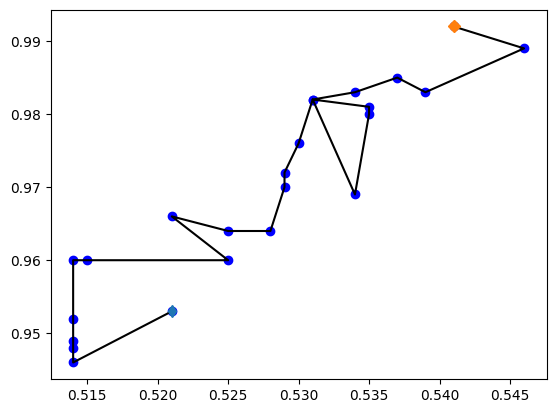

In [23]:
#Global variables
repetitions = 3000
xinitial = -1.2
xlength = 1.2
yinitial = -1.2
ylength = 1.2
stepc = 0.001
search_radius = 7

deci_round = str(stepc)[::-1].find('.')
x = np.arange(xinitial, xlength, stepc)
y = np.arange(yinitial, ylength, stepc)
#provider = IBMQ.load_account()

if __name__ == '__main__':
    _, index_log = gradient_method()
    #r = full_calculation()

    index_map_x = []
    index_map_y = []
    for i in range(len(index_log)):
        index_map_x.append(x[index_log[i][0]])
        index_map_y.append(y[index_log[i][1]])

    plt.plot(index_map_x, index_map_y, 'bo', index_map_x, index_map_y, 'k')
    #thin diamond is start
    plt.plot(index_map_x[0], index_map_y[0], 'd')
    #diamon is end
    plt.plot(index_map_x[-1], index_map_y[-1], 'D')
    #plt.imshow(r, cmap='hot', interpolation='antialiased', extent=[xinitial, xlength, yinitial, ylength], origin='lower');
    


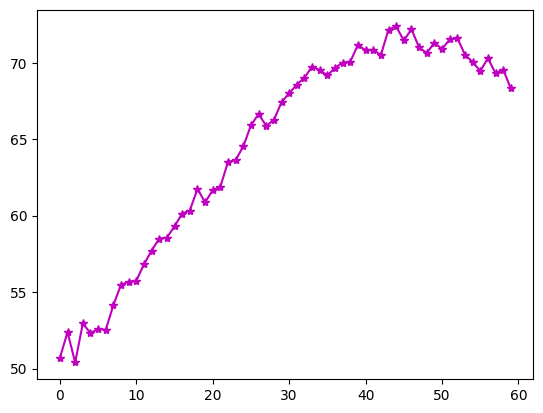

In [45]:
#for i in range(len(r)-18):
    #plt.plot(r[i])

h = []
for i in range(len(x)):
    ave_val = 0
    for j in range(len(y)):
        ave_val = ave_val + r[j][i]
    h.append(ave_val/len(x))
plt.plot(h, '*m-')
#blue line is r[0] which is not within the pattern